In [3]:
def dydt(t,y):
    
    return -0.1 * y

In [4]:
def Forward_Euler(t,y,h):
    
    for i in range(len(t)-len(y)):
        
        y += [y[i] + (h * dydt(t[i],y[i]))]
    
    return t,y

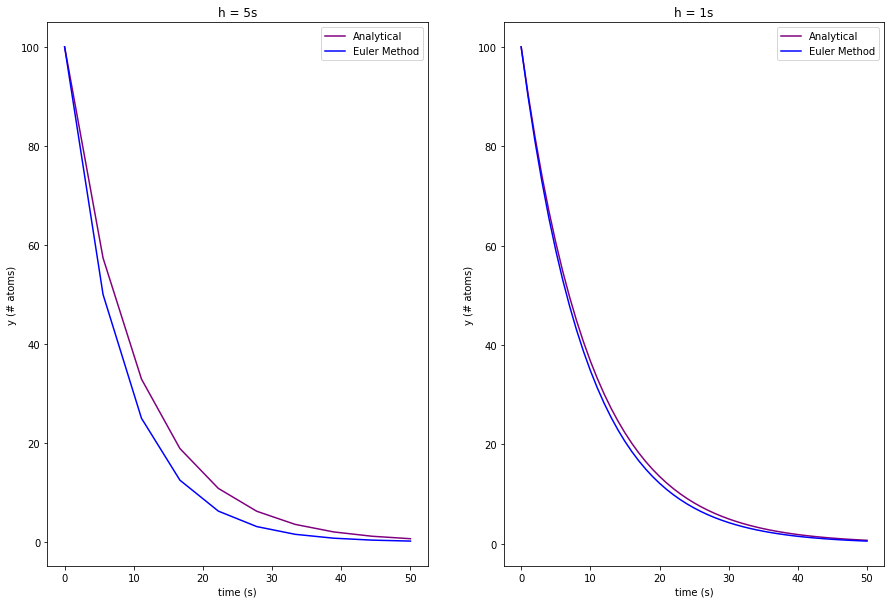

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))


#look at slide 212 of Slides
h = 5
t = np.linspace(0,50,int(50/h))
y = [100]

#when t = 0, y = 100. So c = 100 
y_analytical = 100/(np.exp(t*0.1))

t_Euler1, y_Euler1 = Forward_Euler(t,y,5)
ax1.plot(t,y_analytical, label='Analytical', color='purple')
ax1.plot(t_Euler1, y_Euler1, label='Euler Method', color='blue')

ax1.set_title('h = 5s')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('y (# atoms)')
ax1.legend()

h = 1
t = np.linspace(0,50,int(50/h)+1)
y_analytical = 100/(np.exp(t*0.1))

y = [100]
t_Euler2, y_Euler2 = Forward_Euler(t,y,1)
ax2.plot(t,y_analytical, label='Analytical', color='purple')
ax2.plot(t_Euler2, y_Euler2, label='Euler Method', color='blue')


ax2.set_title('h = 1s')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('y (# atoms)')
ax2.legend();

#can defo clean up above code to do it in one for loop but I cba

In [68]:
#Slide 215
def Heuns(t,y,h):
    
    for i in range(len(t)-len(y)):
        
        k1 = h * dydt(t[i], y[i])
        k2 = h * dydt(t[i] + h, y[i] + k1)
        
        y += [y[i] + ((k1+k2)/2)]
        
    return t,y

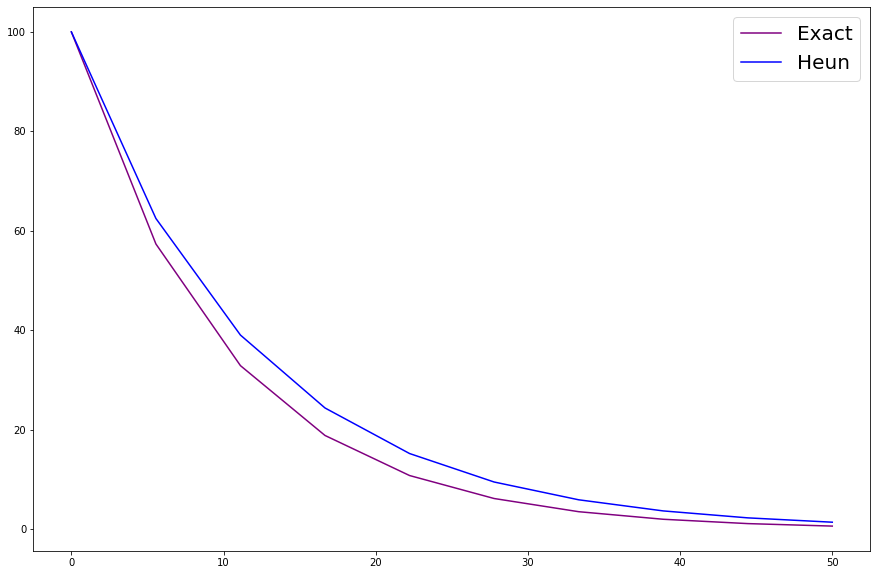

In [69]:
#when h = 5s
h = 5
t = np.linspace(0,50,int(50/h))
y = [100]

#when t = 0, y = 100. So c = 100 
y_analytical = 100/(np.exp(t*0.1))

t_Heun, y_Heun = Heuns(t,y,h)

plt.figure(figsize=(15,10))
plt.plot(t, y_analytical, label='Exact', color='purple')
plt.plot(t_Heun, y_Heun, label='Heun', color='blue')
plt.legend(prop={'size': 20});

In [72]:
def RK4(t,y,h):
    
    for i in range(len(t)-len(y)):
        
        k1 = h * dydt(t[i], y[i])
        k2 = h * dydt(t[i] + (h/2), y[i] + (k1)/2)
        k3 = h * dydt(t[i] + (h/2), y[i] + (k2)/2)
        k4 = h * dydt(t[i] + h,  y[i] + k3)
        
        y += [y[i] + ((k1+(2*k2)+(2*k3)+k4)/6)]
        
    return t,y

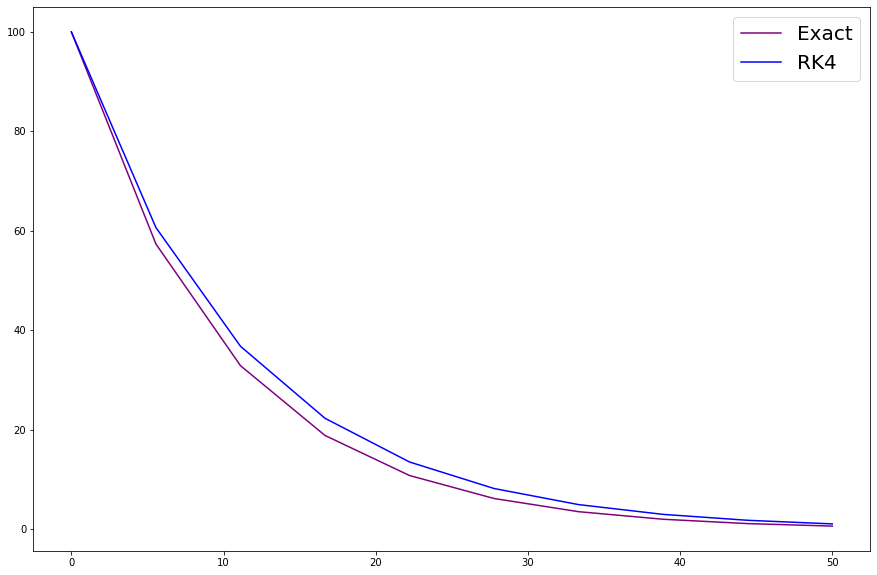

In [75]:
#when h = 5s
h = 5
t = np.linspace(0,50,int(50/h))
y = [100]

#when t = 0, y = 100. So c = 100 
y_analytical = 100/(np.exp(t*0.1))

t_RK4, y_RK4 = RK4(t,y,h)

plt.figure(figsize=(15,10))
plt.plot(t, y_analytical, label='Exact', color='purple')
plt.plot(t_RK4, y_RK4, label='RK4', color='blue')
plt.legend(prop={'size': 20});



## For Bwd Euler you have to rearrnage yourself manually and input expression

In [6]:
def dydt(t,y):
    
   return (-2*y*t) - (2*(t^3))


def BwEuler(t0, y0, h, t_end):
    
    t = [t0]
    y = [y0]
    
    for i in range(1,int((t_end/h)+1)):
        
        t += [t[i-1] + h]
        y += [(y[n-1]-(2*h*(t[n])^3))/(1+(2*h*t[n]))]
        
    return t,y



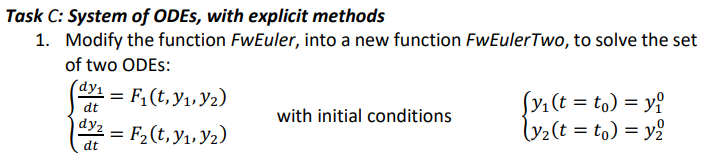

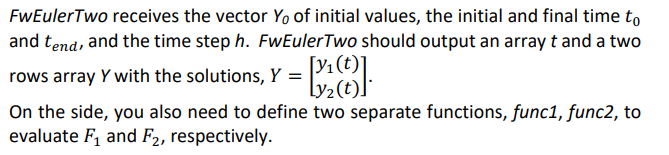

In [7]:
def func1(t, y):
    
    return (0.3*y[0]*y[1]) - (0.8*y[0])

def func2(t, y):
    
    return (1.1*y[1]) - (y[1]*y[0])


#Review Slide 261 of Numerical Methods slides to see how it works
def FwEulerTwo(t0,y01,y02,h, t_end):
    
    t = [t0]
    
    #make an array of two rows. One for y1(t) and one for y2(t)
    Y = np.ndarray((2,int((t_end/h))+1))
    Y[0,0] = y01
    Y[1,0] = y02
    
    for n in range(1,int((t_end/h)+1)):
        
        t += [t[n-1] + h]
        
        Y[0,n] = Y[0,n-1] + (h * func1(t[n-1],Y[:,n-1]))
        Y[1,n] = Y[1,n-1] + (h * func2(t[n-1],Y[:,n-1]))
        
    return t,Y

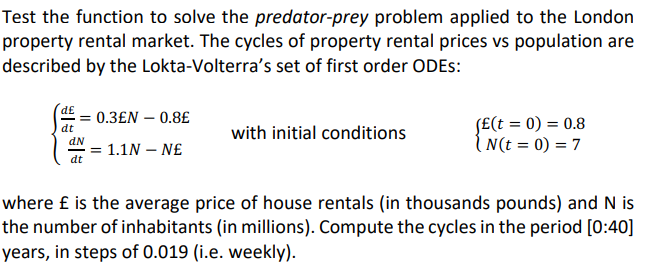

[0.0000e+00 1.9000e-02 3.8000e-02 ... 3.9957e+01 3.9976e+01 3.9995e+01]
[[0.8        0.81976    0.84019451 ... 3.36935806 3.3508185  3.33097984]
 [7.         7.0399     7.07738437 ... 1.70133277 1.62797504 1.55835379]]


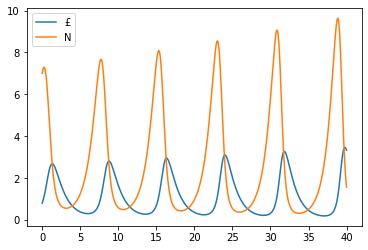

In [8]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
y01 = 0.8
y02 = 7
t_end = 40
h = 0.019

t, Y = FwEulerTwo(t0, y01, y02, h, t_end)

t = np.array(t)

print(t)
print(Y)

plt.plot(t,Y[0,:], label='£')
plt.plot(t,Y[1,:], label='N')
plt.legend();

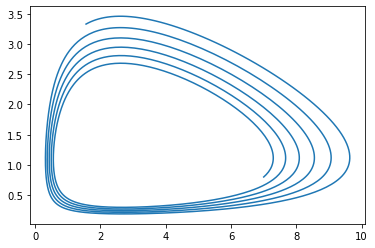

In [9]:
#Number of inhabitants vs rental price plot
plt.plot(Y[1,:], Y[0,:]);

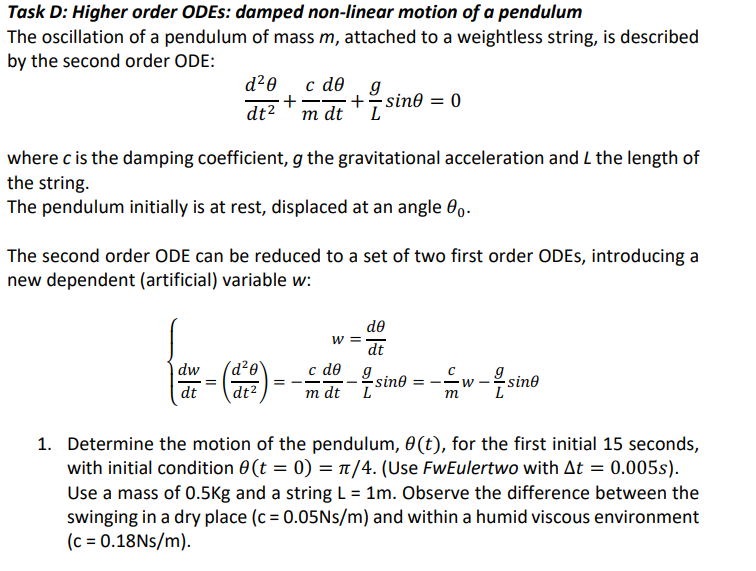

In [10]:
#func1 = w = dtheta/dt
def func1(t,y):
    #first element of every row in Y would represent theta
    #second element of every row in Y would represent d(theta)/dt = w 
    return y[1]

#func2 = dw/dt
def func2(t,y):
    g = 9.8
    L = 1
    m = 0.5
    c = 0.05
    
    return (-c/m * y[1]) - (g/L) * np.sin(y[0])

[[ 0.78539816  0.78539816  0.78522492 ... -0.06775748 -0.07573532
  -0.08369258]
 [ 0.         -0.03464823 -0.06927914 ... -1.59556795 -1.59145259
  -1.58694938]]


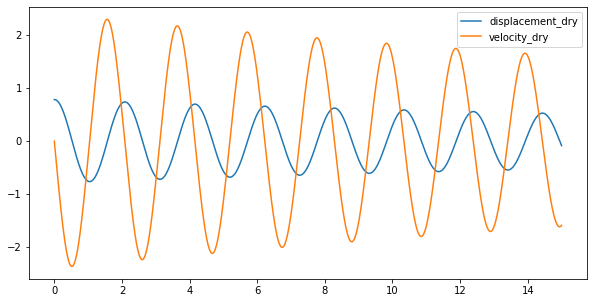

In [11]:
t0 = 0
t_end = 15
h  = 0.005
#initial angle
y01 = np.pi/4
#started off at rest
y02 = 0


t_dry, Y_dry = FwEulerTwo(t0, y01, y02, h, t_end)

print(Y_dry)

plt.figure(figsize=(10,5))
plt.plot(t_dry, Y_dry[0,:], label='displacement_dry')
plt.plot(t_dry, Y_dry[1,:], label='velocity_dry')


plt.legend();